In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics

import types
from sklearn.manifold import TSNE


import seaborn as sns
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()
df = pd.read_csv("world_happiness.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Score'},)
layout = dict(title = 'Global Happiness Score', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))


In [8]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Rank'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Rank'},)
layout = dict(title = 'Global Happiness Rank', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))

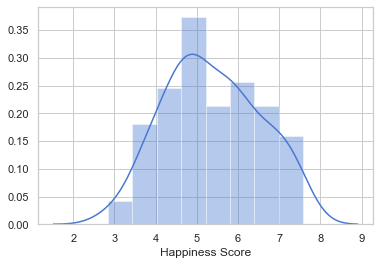

In [9]:
sns.distplot(df['Happiness Score'])


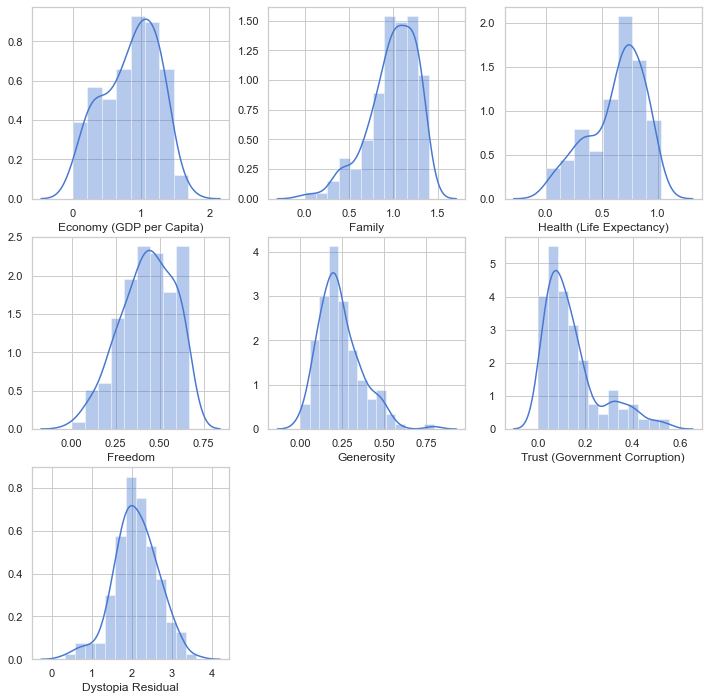

In [10]:
happiness_factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Generosity', 'Trust (Government Corruption)', 
           'Dystopia Residual']

def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sns.distplot(data[column])

plt.figure(figsize=(12,12))
plot_columns_on_grid(df, happiness_factors, (3, 3))

In [11]:
Y = df['Happiness Score']
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [12]:
print('Coefficients:',lm.coef_)


Coefficients: [-6.62640689e-04  1.00012756e+00  9.99809853e-01  9.99984279e-01
  9.99719976e-01  9.99885249e-01  9.99747287e-01  9.99955045e-01]


In [13]:
predictions = lm.predict( X_test)


Text(0, 0.5, 'Predicted Y')

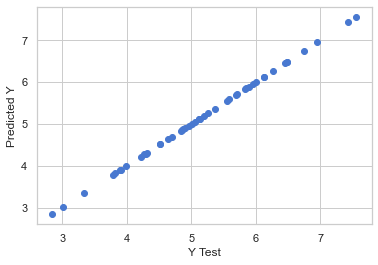

In [14]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [15]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 0.00026861910100868064
Mean Squared Error: 9.548227095651216e-08
Root Mean Squared Error: 0.0003090020565570918


In [16]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Standard Error,-0.000663
Economy (GDP per Capita),1.000128
Family,0.999810
Health (Life Expectancy),0.999984
Freedom,0.999720
Trust (Government Corruption),0.999885
Generosity,0.999747
Dystopia Residual,0.999955


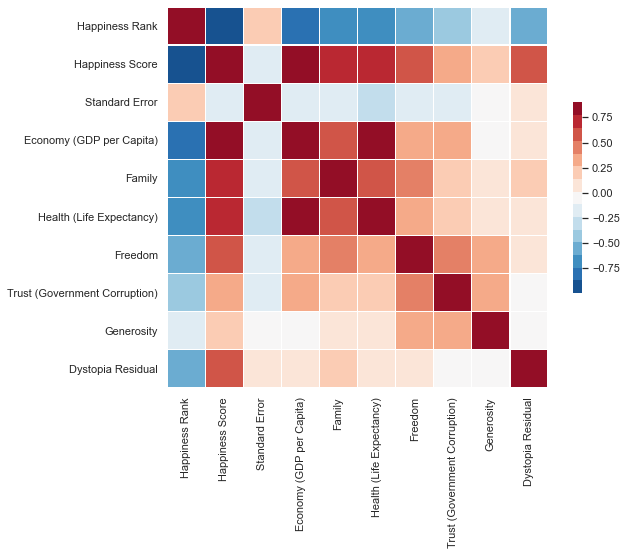

In [18]:
correlation_mat = df.corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(correlation_mat, vmax=.9,cmap=sns.color_palette("RdBu_r", 15), 
            square=True,linewidths=.5, cbar_kws={"shrink": .5})


In [19]:
by_region = df.groupby('Region')


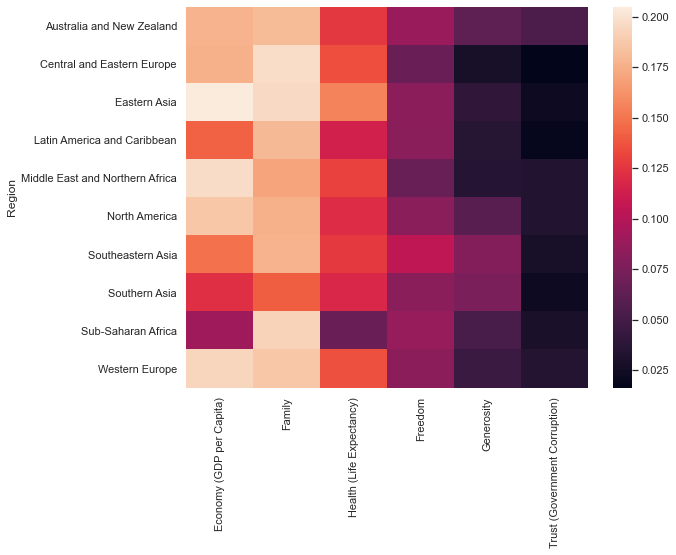

In [20]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(by_region[happiness_factors[:-1]].mean().div(by_region['Happiness Score'].mean(), axis='index'))

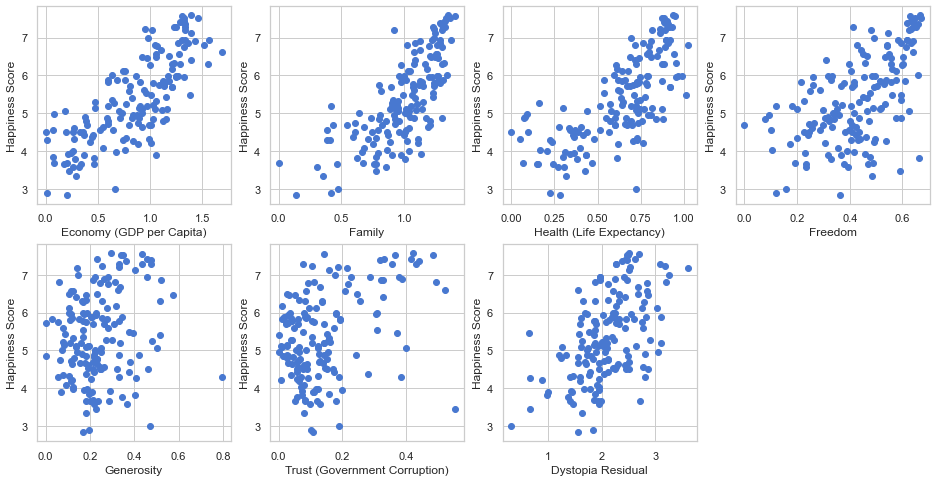

In [21]:
happiness_factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Generosity', 'Trust (Government Corruption)', 
           'Dystopia Residual']

def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        plt.scatter(data[column],df['Happiness Score'])
        plt.xlabel(column);
        plt.ylabel('Happiness Score');

plt.figure(figsize=(16,8))
plot_columns_on_grid(df, happiness_factors, (2, 4))

In [22]:
by_region[['Happiness Score'] + happiness_factors].mean().sort_values(by='Happiness Score', ascending=False)


,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
Region,,,,,,,,
Australia and New Zealand,7.285000,1.291880,1.314450,0.919965,0.645310,0.455315,0.392795,2.265355
North America,7.273000,1.360400,1.284860,0.883710,0.589505,0.429580,0.244235,2.480935
Western Europe,6.689619,1.298596,1.247302,0.909148,0.549926,0.302109,0.231463,2.151185
Latin America and Caribbean,6.144682,0.876815,1.104720,0.703870,0.501740,0.217788,0.117172,2.622577
Eastern Asia,5.626167,1.151780,1.099427,0.877388,0.462490,0.225885,0.127695,1.681607
Middle East and Northern Africa,5.406900,1.066973,0.920490,0.705616,0.361751,0.190375,0.181702,1.980009
Central and Eastern Europe,5.332931,0.942438,1.053042,0.718774,0.358269,0.152264,0.086674,2.021400
Southeastern Asia,5.317444,0.789054,0.940468,0.677357,0.557104,0.419261,0.151276,1.783020
Southern Asia,4.580857,0.560486,0.645321,0.540830,0.373337,0.341429,0.102536,2.016769


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

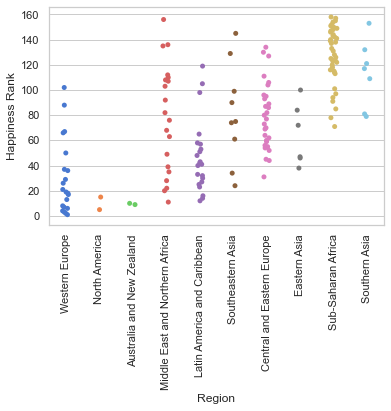

In [23]:
g = sns.stripplot(x = "Region", y = "Happiness Rank", data = df, jitter = True)
plt.xticks(rotation = 90)

In [24]:
europe=['Switzerland','Iceland','Denmark','Norway','Finland','Netherlands',
        'Sweden','Austria','Luxembourg','Ireland','Belgium','United Kingdom','Germany',
        'France','Czech Republic','Spain','Malta','Slovakia','Italy','Moldova','Slovenia',
        'Lithuania','Belarus','Poland','Croatia','Russia','North Cyprus','Cyprus','Kosovo',
        'Turkey','Montenegro','Romania','Serbia','Portugal','Latvia','Macedonia','Albania',
        'Bosnia and Herzegovina','Greece','Hungary','Ukraine','Bulgaria']

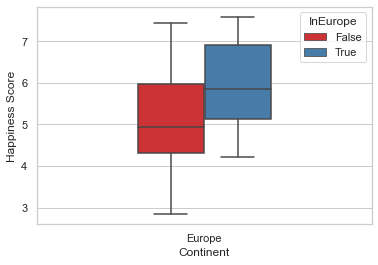

In [25]:
df['InEurope']=(df['Country'].isin(europe))
df['Continent']= 'Europe'
sns.boxplot(x='Continent',y='Happiness Score',hue='InEurope',width = 0.4,
            data=pd.concat([df[['Continent','Happiness Score','InEurope']]]),palette='Set1');

In [26]:
df_norm = df
df_norm[happiness_factors] = df_norm[happiness_factors].div(df['Happiness Score'].values, axis=0)

In [27]:
cluster_n = 3
k_means = KMeans(init='k-means++', n_clusters=cluster_n, n_init=10)
cluster_labels = k_means.fit_predict(df_norm[happiness_factors[:-1]])

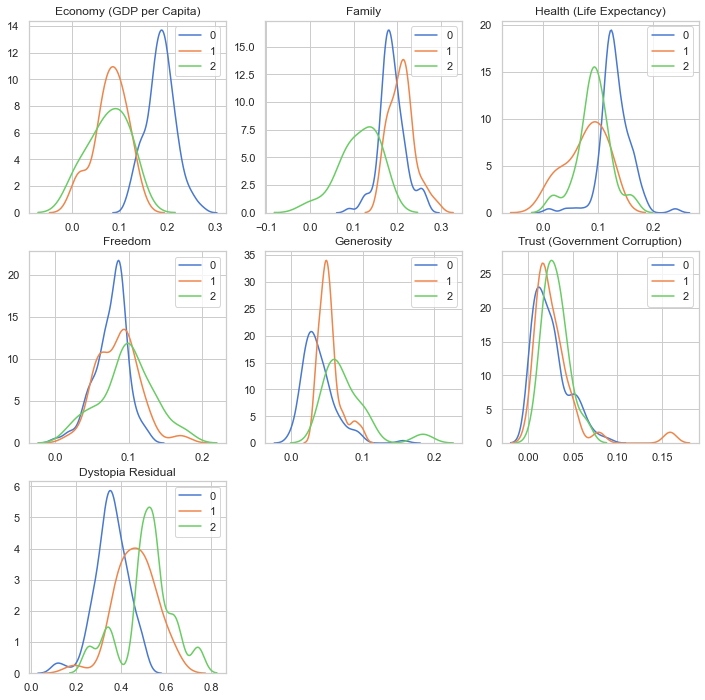

In [28]:
plt.figure(figsize=(12,12))
for i, factor in enumerate(happiness_factors):
    ax = plt.subplot(3, 3, i+1)
    for cluster in range(cluster_n):
        sns.kdeplot(df_norm.loc[cluster_labels == cluster, factor], label=cluster)
        ax.set_title(factor)


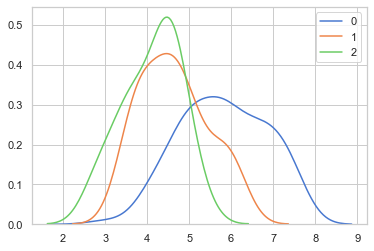

In [29]:
for cluster in range(cluster_n):
    sns.kdeplot(df.loc[cluster_labels == cluster, 'Happiness Score'], label=cluster)